In [315]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os,sys



In [316]:
import warnings
warnings.filterwarnings('ignore')

In [317]:
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA
from scripts.plot import Plot

### CHECKING FOR MISSING VALUE, AND OTHER INFORMATIONS FOR STORE.CSV

In [318]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
store = pd.read_csv("../data/store.csv", na_values=missing_values)
eda = EDA(store)
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [319]:
eda.has_missing_values()

True

In [320]:
eda.data_describe(size=True)

(1115, 10)

In [321]:
eda.data_describe(describe=True)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [322]:
# df.isnull().sum()

In [323]:
store.fillna("0", inplace = True) 
# df.isnull().sum()

### CLEANING AND CHECKING THE TRAIN.CSV CONTENTS

In [324]:
train = pd.read_csv("../data/train.csv")
# train.isnull().sum()
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### CLEANING AND CHECKING THE TEST.CSV CONTENTS

In [325]:
test = pd.read_csv("../data/test.csv")
test['Open'] = test['Open'].fillna(method='bfill')

### MERGING STORE.CSV AND TRAIN.CSV

In [326]:
train_store = pd.merge(train, store, how = 'left', on = "Store")
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,0,0,0,0,0


In [327]:
train_store.get('SchoolHoliday').value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [328]:
plot = Plot()

## UNIVARIATE ANALYSIS

In [329]:
# plot.plot_hist(train_store,"Sales", "blue")

In [330]:
# plot.plot_hist(train_store,"Customers", "green")

In [331]:
# plot.plot_hist(train_store,"Promo", "red")

In [332]:
# plot.plot_hist(train_store,"Promo2", "yellow")

In [333]:
# plot.plot_bar(train_store, "Sales", "StateHoliday", "sales vs stateholiday", 'sales', 'stateholiday')

In [334]:
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
train_store['StateHoliday']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 1017209, dtype: object

## MULTIVIRATE ANALYSIS 

In [335]:
train_store.get('StateHoliday').value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### MERGING STORE.CSV AND TEST.CSV

In [336]:
test_store = pd.merge(test, store, how = 'left', on = "Store")

In [337]:
test_store

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0,0,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0,0,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0,0,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,0,0,0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,0,0,0,0,0,0


In [338]:
# train_store['date'] = pd.to_datetime(train_store['Date'])
# train_store['year'] = pd.DatetimeIndex(train_store['Date']).year
# train_store['month'] = pd.DatetimeIndex(train_store['Date']).month
# train_store

## UNIVIRATE ANALYSIS fot test dataset

In [339]:
# plot.plot_hist(test_store,"Promo", "red")

In [340]:
# plot.plot_hist(test_store,"Promo2", "yellow")

## CONVERT TO TIME SERIES DATA

In [341]:
ID = test_store['Id']
test_store.drop('Id',inplace=True,axis=1)

train_store.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_store.sort_values(["Store","Date"], ignore_index=True, inplace=True)

for dataset in (train_store,test_store):
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset['Day'] = dataset.Date.dt.day
    dataset['Month'] = dataset.Date.dt.month
    dataset['Year'] = dataset.Date.dt.year
    dataset['DayOfYear'] = dataset.Date.dt.dayofyear
    dataset['WeekOfYear'] = dataset.Date.dt.weekofyear
    dataset.set_index('Date', inplace=True)

In [342]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,c,a,...,2008.0,0,0,0,0,1,1,2013,1,1
2013-01-02,1,3,5530,668,1,0,0,1,c,a,...,2008.0,0,0,0,0,2,1,2013,2,1
2013-01-03,1,4,4327,578,1,0,0,1,c,a,...,2008.0,0,0,0,0,3,1,2013,3,1
2013-01-04,1,5,4486,619,1,0,0,1,c,a,...,2008.0,0,0,0,0,4,1,2013,4,1
2013-01-05,1,6,4997,635,1,0,0,1,c,a,...,2008.0,0,0,0,0,5,1,2013,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,1115,1,10712,608,1,1,0,1,d,c,...,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",27,7,2015,208,31
2015-07-28,1115,2,8093,500,1,1,0,1,d,c,...,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",28,7,2015,209,31
2015-07-29,1115,3,7661,473,1,1,0,1,d,c,...,0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",29,7,2015,210,31


In [343]:
train_store.shape

(1017209, 22)

In [344]:
test_store.shape

(41088, 20)

In [345]:
test_store.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,
2015-08-01,1,6,1.0,0,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,1,8,2015,213,31
2015-08-02,1,7,0.0,0,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,2,8,2015,214,31
2015-08-03,1,1,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,3,8,2015,215,32
2015-08-04,1,2,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,4,8,2015,216,32
2015-08-05,1,3,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,0,0,0,5,8,2015,217,32


## Numerical plots of the train and test dataset

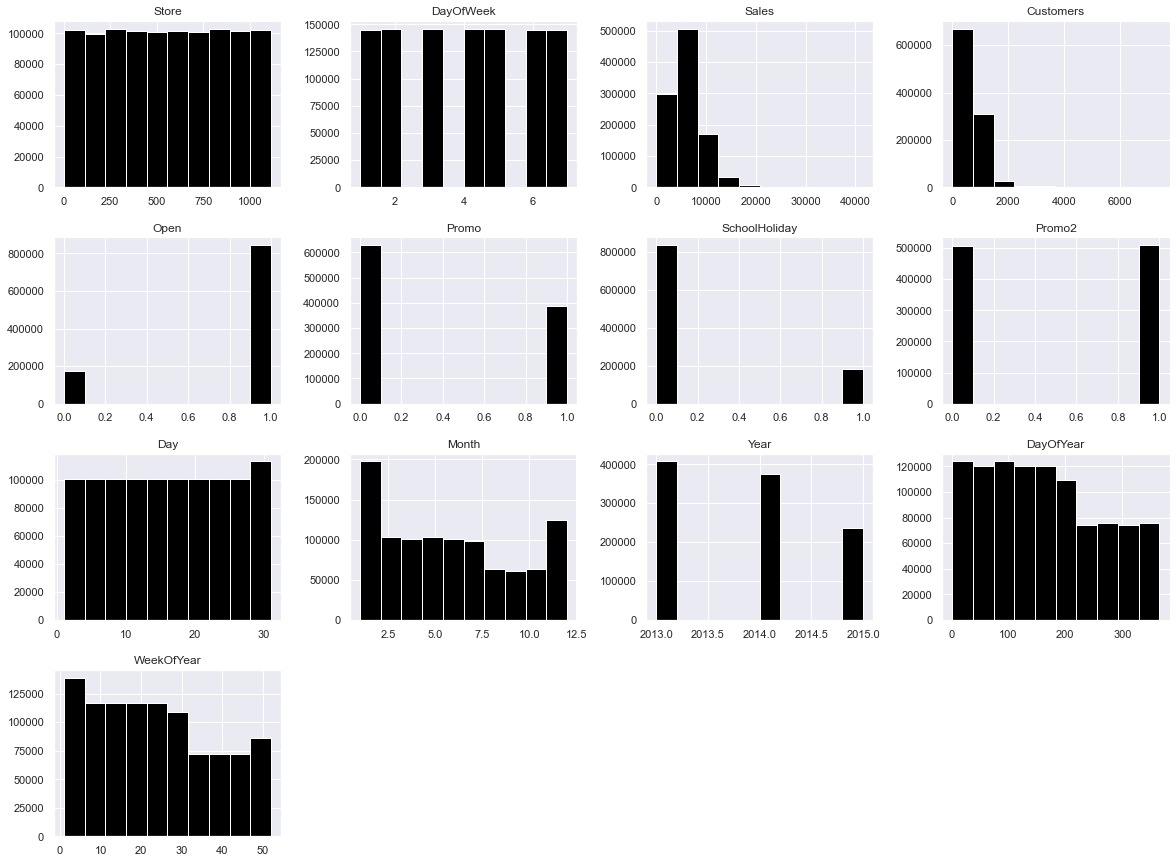

In [346]:
#Numerical Features Histograms (Train)
num_feats = list(train_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_store[num_feats].hist(figsize=(20,15), color='black');

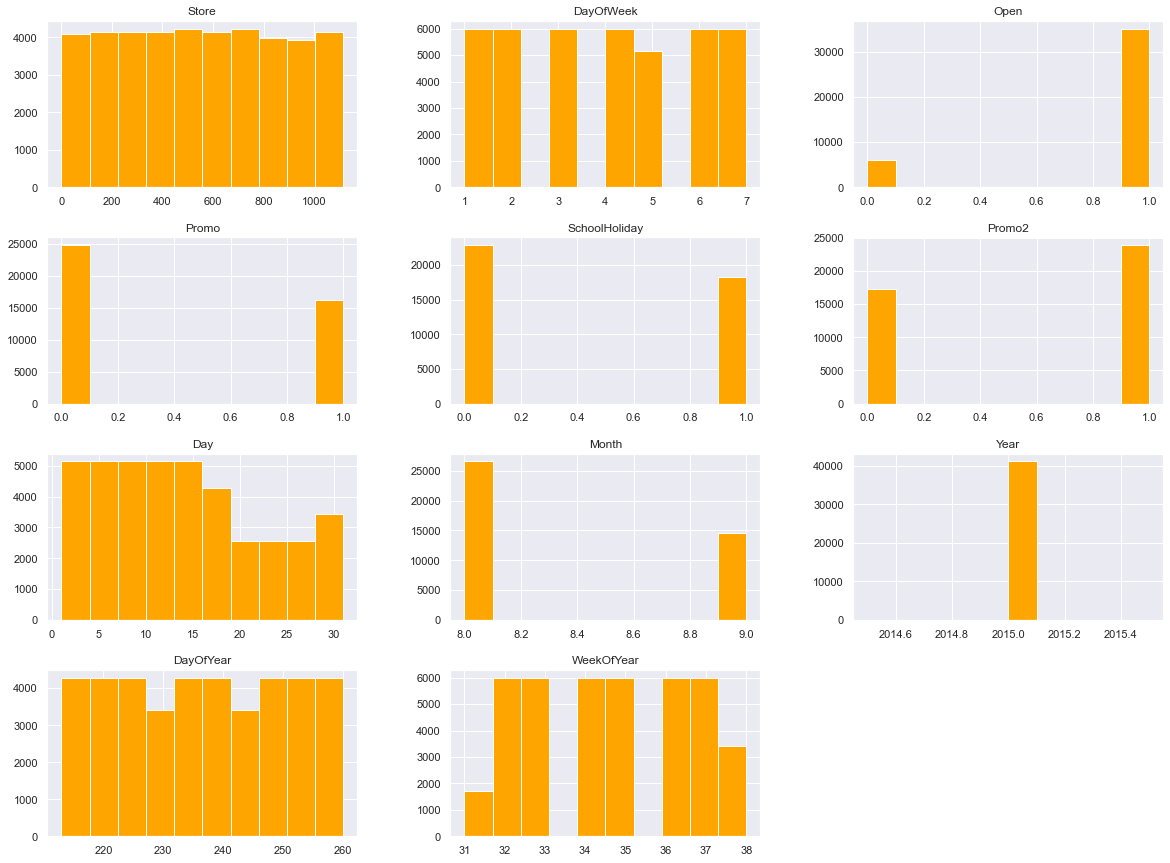

In [347]:
#Numerical Features Histograms (Test)
num_feats = list(test_store.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_store[num_feats].hist(figsize=(20,15), color='orange');

#### sales behavior before, during and after holidays

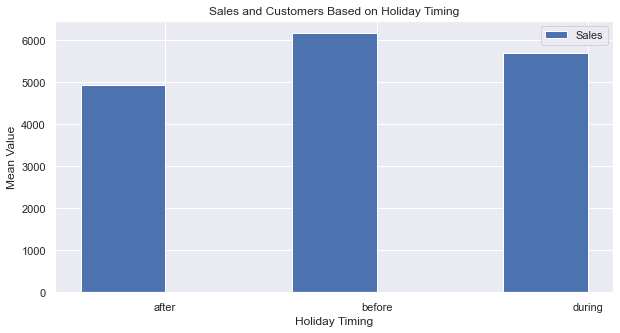

In [348]:
# Considering christmas lasts for 12 days, Easter for 50 days and public holidays for 1 day.
# And considering before and after periods to be 5 less and 5 more days before and after the holiday for christmas
# and 10 days for Easter
# And 3 days for public holiday
# get state holiday list
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
def affect_list(change_list, interval, duration, index):
    start_pt = int(index-duration/2) - interval
    try:
        for index in range(start_pt, start_pt + interval):
            change_list[index] = 'before'
        for index in range(start_pt + interval, start_pt + interval + duration):
            change_list[index] = 'during'
        for index in range(start_pt + interval + duration, start_pt + interval + duration + interval):
            change_list[index] = 'after'
    except:
        pass

    return change_list


state_holiday_list = train_store['StateHoliday'].values.tolist()
def modify_holiday_list(holiday_list:list) -> list:
    new_index = ["neither"] * len(holiday_list)
    for index , value in enumerate(holiday_list):
        if value == 'a': #public holiday
            affect_list(new_index, 3, 1, index)
        elif value == 'b': #Easter
            affect_list(new_index, 10, 50, index)
        elif value == 'c': # christmas
            affect_list(new_index, 5, 12, index)
        else:
            pass

    return new_index
    
sales_timing_list = modify_holiday_list(state_holiday_list)
timing_added_df = train_store.loc[:,['Sales','Customers']]
timing_added_df['HolidayTiming'] = sales_timing_list
grouped_timing = timing_added_df.groupby('HolidayTiming').agg(
    {'Sales': 'mean', 'Customers': 'mean'})
grouped_timing = grouped_timing.iloc[:3, :]

plt.figure(figsize=(10,5))
X_axis = np.arange(len(grouped_timing.index))
plt.bar(X_axis - 0.2, grouped_timing['Sales'], 0.4, label='Sales')
# plt.bar(X_axis + 0.2, grouped_timing['Customers'], 0.4, label='Customers')

plt.xticks(X_axis, grouped_timing.index)
plt.xlabel("Holiday Timing")
plt.ylabel("Mean Value")
plt.title("Sales and Customers Based on Holiday Timing")
plt.legend()
plt.savefig('../data/holidaytiming.png')

#####  seasonal (Christmas, Easter etc) purchase behaviours

In [349]:
seasonal = train_store.groupby('StateHoliday').agg({'Sales':'mean'})
seasonal = seasonal.iloc[1:, :]
seasonal

,Sales
StateHoliday,
a,290.735686
b,214.311510
c,168.733171


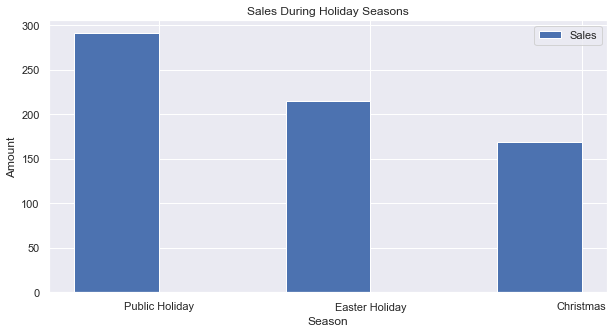

In [350]:
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')

plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales During Holiday Seasons")
plt.legend()

# plt.savefig('../data/holidayseason.png')

#####  correlation between sales and number of customers

In [351]:
sales_customer_rln = train_store.loc[:,['Sales','Customers']]
sales_customer_corr = sales_customer_rln.corr()
sales_customer_corr

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


Text(0.5, 1.0, 'Sales - Customer Relation ')

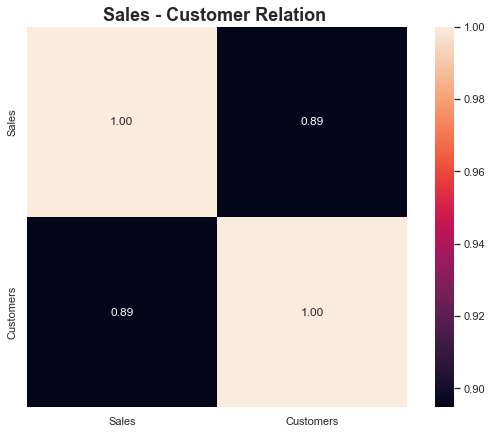

In [352]:
plt.figure(figsize=(10, 7))
sns.heatmap(sales_customer_corr, annot=True, square=True, fmt=".2f")
plt.title('Sales - Customer Relation ', size=18, fontweight='bold')
# plt.savefig('../data/salecustrln.png')

##### How does promo affect sales?

In [353]:
promo = train_store.groupby('Promo').agg({'Customers': 'mean'})
promo

,Customers
Promo,
0,517.823542
1,820.098815


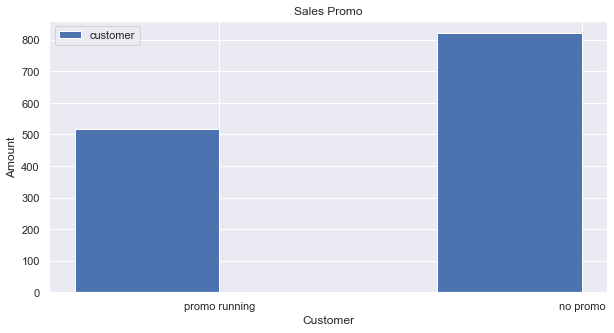

In [354]:
promo.index = ['promo running','no promo']
X_axis = np.arange(len(promo.index))
plt.figure(figsize=(10, 5))
plt.bar(X_axis - 0.2, promo['Customers'], 0.4, label='customer')

plt.xticks(X_axis, promo.index)
plt.xlabel("Customer")
plt.ylabel("Amount")
plt.title("Sales Promo")
plt.legend()

#### How does it affect already existing customers?

In [355]:
promo_customers = train_store.loc[:,['Store','Customers','Promo','Sales']]
store_customer_difference = promo_customers.groupby(['Store','Promo']).agg({'Customers':'mean','Sales':'mean'})
store_customer_difference = store_customer_difference.iloc[:25, :]
store_customer_difference.head()

Customers        Sales
Store Promo                         
1     0      399.682131  3198.994845
      1      577.522222  5152.886111
2     0      366.876289  2855.058419
      1      678.702778  6172.816667
3     0      477.445017  3967.596220

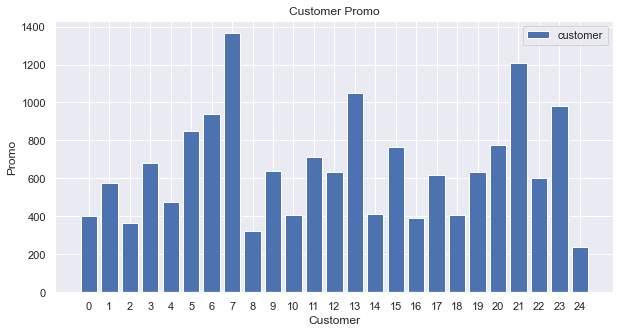

In [356]:
# promo.index = ['promo running','no promo']
X_axis = np.arange(len(store_customer_difference))
plt.figure(figsize=(10, 5))
plt.bar(X_axis, store_customer_difference['Customers'], label='customer')

plt.xticks(X_axis)
plt.xlabel("Customer")
plt.ylabel("Promo")
plt.title("Customer Promo")
plt.legend()

In [357]:
#Getting Per-Store Customer Increase
customer_info = train_store.loc[:, ['Store', 'Customers']]
customer_info = customer_info.groupby('Store').agg({'Customers':'mean'})
customer_info = customer_info.iloc[:50, :]
# customer_info

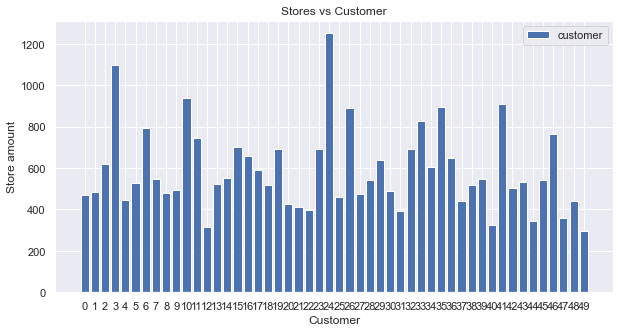

In [358]:
# promo.index = ['promo running','no promo']
X_axis = np.arange(len(customer_info))
plt.figure(figsize=(10, 5))
plt.bar(X_axis, customer_info['Customers'], label='customer')

plt.xticks(X_axis)
plt.xlabel("Customer")
plt.ylabel("Store amount")
plt.title("Stores vs Customer")
plt.legend()

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

#### Trends of customer behavior during store open and closing times

In [359]:
customer_behaviour = train_store.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


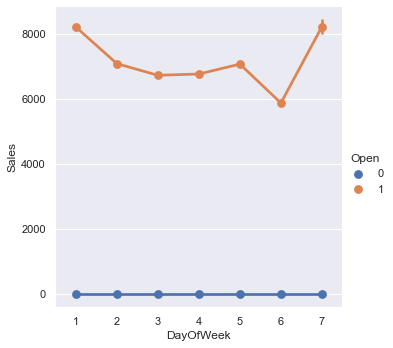

In [360]:
sns.catplot(data=train_store, x="DayOfWeek", y="Sales", hue="Open", kind='point')

#### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [361]:
# open to weekday relation ---- to do, promo to weekday
# open_all_weekdays (Mon - Fri)
# First Remove all holiday related days
holiday_out_df = train_store[train_store['StateHoliday'] == 0]
weekdays_df = holiday_out_df[holiday_out_df['DayOfWeek'] <= 5]
not_open_stores = weekdays_df[weekdays_df['Open'] == 0]
not_open_stores_id = not_open_stores['Store']
not_open_stores_id = not_open_stores_id.values.tolist()

all_weekdays_open_stores = train_store[~train_store['Store'].isin(not_open_stores_id)]
all_weekdays_open_stores
not_all_weekdays_open_stores = train_store[train_store['Store'].isin(not_open_stores_id)]

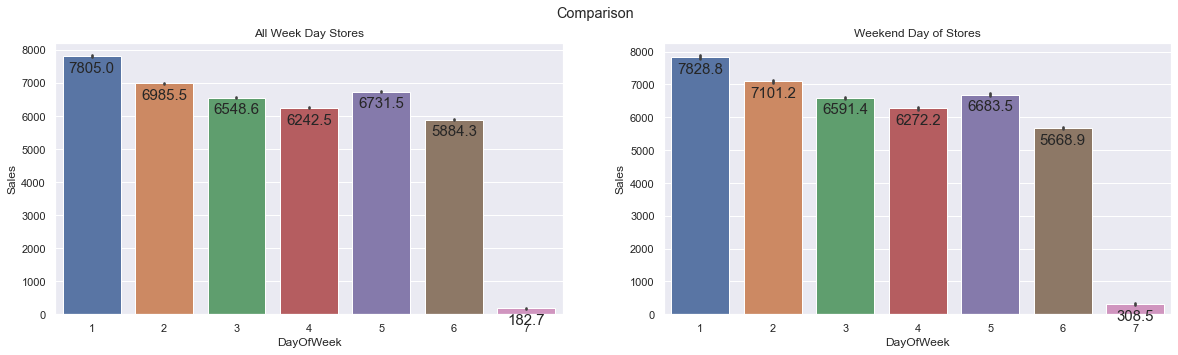

In [362]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(f'Comparison')
plot1 = sns.barplot(
    x='DayOfWeek', y='Sales', data=all_weekdays_open_stores, ax=axs[0])
plot1.set_title('All Week Day Stores')
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')

plot2 = sns.barplot(
    x='DayOfWeek', y='Sales', data=not_all_weekdays_open_stores, ax=axs[1])
plot2.set_title('Weekend Day of Stores')
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -12),
                   textcoords='offset points')


#### Check how the assortment type affects sales

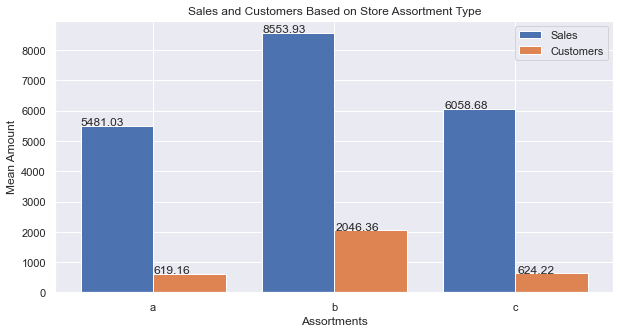

In [363]:
assortment_sales_rln = train_store.loc[:, ['Assortment', 'Sales', 'Customers']]
assortment_sales_rln = assortment_sales_rln.groupby(
    "Assortment").agg({'Sales': 'mean', 'Customers': 'mean'})

X_axis = np.arange(len(assortment_sales_rln.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, assortment_sales_rln['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, assortment_sales_rln['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005))

plt.xticks(X_axis, assortment_sales_rln.index)
plt.xlabel("Assortments")
plt.ylabel("Mean Amount")
plt.title("Sales and Customers Based on Store Assortment Type")
plt.legend()
plt.show()

[]

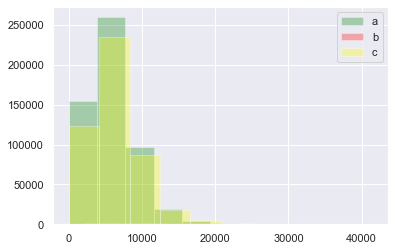

In [364]:
#Sales_Assortment
sns.set()
plt.hist(train_store[train_store['Assortment'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_store[train_store['Assortment'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_store[train_store['Assortment'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.legend()
plt.plot()

#### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [365]:
comp_dist_df = train_store.loc[:, ['Store','Sales','Customers','CompetitionDistance']]
comp_dist_df = comp_dist_df.dropna()
comp_dist_df

,Store,Sales,Customers,CompetitionDistance
Date,,,,
2013-01-01,1,0,0,1270.0
2013-01-02,1,5530,668,1270.0
2013-01-03,1,4327,578,1270.0
2013-01-04,1,4486,619,1270.0
2013-01-05,1,4997,635,1270.0
...,...,...,...,...
2015-07-27,1115,10712,608,5350.0
2015-07-28,1115,8093,500,5350.0
2015-07-29,1115,7661,473,5350.0


In [366]:
group_comp_dist = comp_dist_df.groupby('Store', as_index=False).median()
group_comp_dist

,Store,Sales,Customers
0,1,4373.5,529.0
1,2,4395.5,542.0
2,3,5892.0,705.0
3,4,9062.0,1261.5
4,5,4180.0,537.0
...,...,...,...
1110,1111,4614.0,431.0
1111,1112,8707.0,755.0
1112,1113,6018.5,675.5
1113,1114,19556.5,3086.0


Text(0.5, 1.0, 'Competition - Sales and Customer Relation')

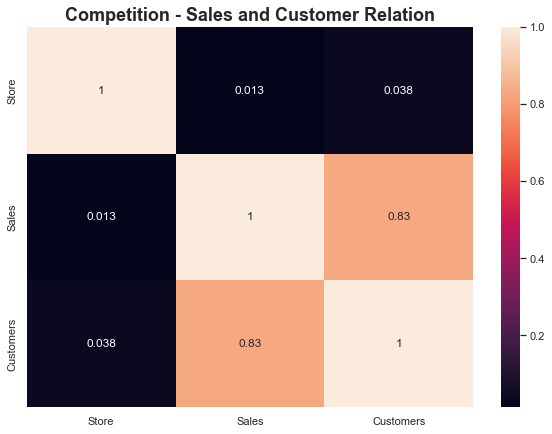

In [367]:
group_comp_dist_corr = group_comp_dist.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(group_comp_dist_corr, annot=True)
plt.title('Competition - Sales and Customer Relation', size=18, fontweight='bold')

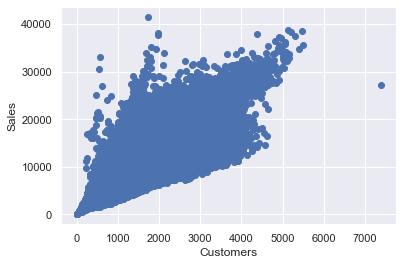

In [368]:
# Check & compare sales behavior before, during and after holidays
plt.scatter(train_store['Customers'], train_store['Sales'])
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.show()

#### How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [369]:
open_close = train_store.loc[:, ['Store', 'Sales', 'Customers', 'month', 'year',
                                 "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]
open_close

KeyError: "['month', 'year'] not in index"

In [ ]:
open_close = open_close.groupby('Store').agg({'CompetitionDistance':'mean','CompetitionOpenSinceMonth':'mean', 'CompetitionOpenSinceYear':'mean'})
open_close
# customer_behaviour = train_store.groupby('Open').agg({'Customers':'mean','Sales':'mean'})